In [1]:
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import gamma
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

In [3]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [4]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

In [5]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [6]:
# B = V / mean
# a = mean^2 / V
alpha = pow(np.mean(arr),2) / np.var(arr)
beta = np.var(arr) / np.mean(arr)
print(alpha,beta)

0.8392267275972294 0.07659547766381847


In [7]:
cdf = gamma.cdf(.16,alpha,scale=beta)
print(cdf)

0.9073077466738917


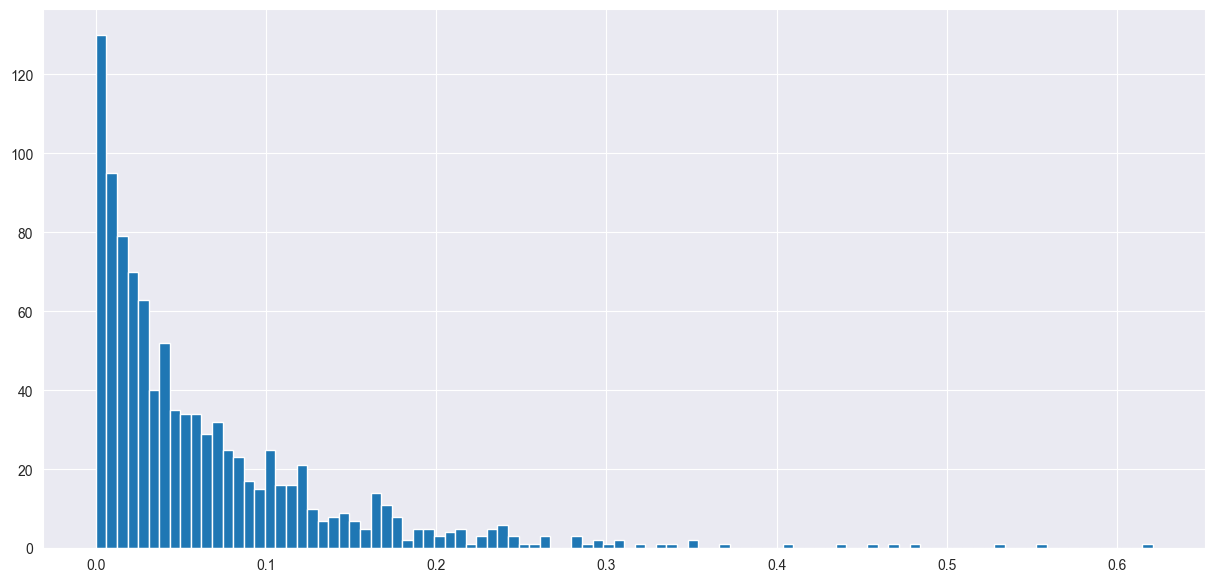

In [8]:
plt.hist(gamma.rvs(alpha,scale=beta,size=1000),bins=100)
plt.show()

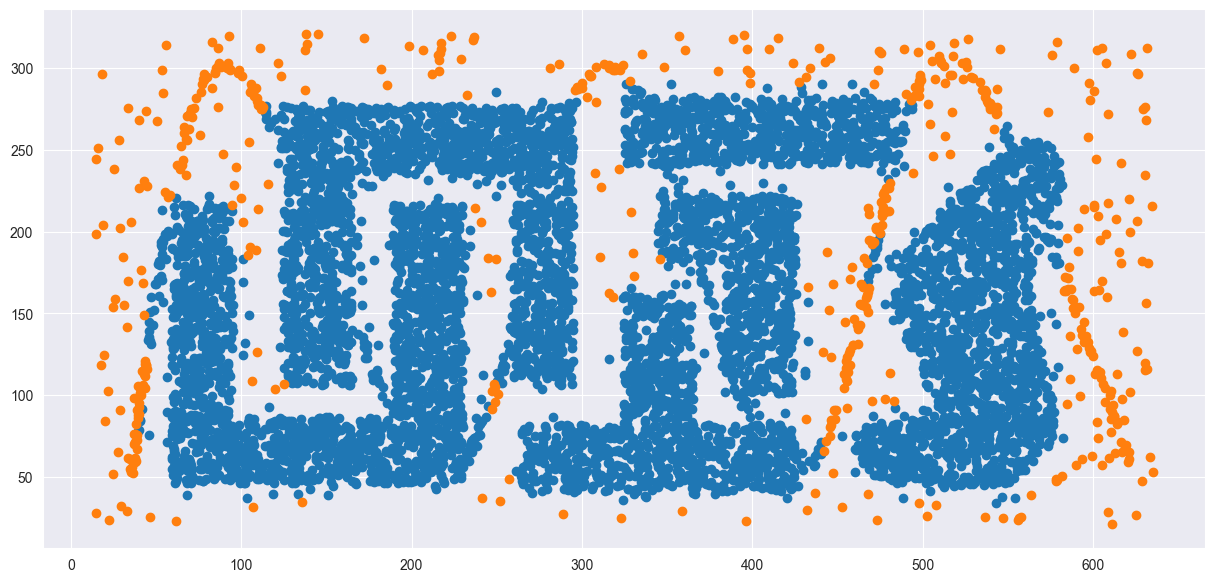

In [9]:
newValue = arr < .16
plt.scatter(X[newValue,0],X[newValue,1])
plt.scatter(X[~newValue,0],X[~newValue,1])
plt.show()